# Topic of Labs

This week's labs will involve some further explorations of topics we have begun in class. 

## Lab 1

 * Build a Python library our of Week 6 Lecture 2 material.  This is a Victoria Police Department crime stats library.  We start with the *vicpd.py* library, which is a collation of everything we did in Week 6, Lecture 2.  
 
 * Use **dir(vicpd)** to list the commands available in the vicpd library, or just load the file and look.
 
 * We continue exploring the VicPD and weather stats, looking to make inferences with the data. 
 

In [2]:
import vicpd as vpd

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain mm, snow cm) indexed on date
VicPD library loaded.


**Suggestions**

- Make a variety of plots, of one daily crime count vs another. 

- Look for linear relationships, or perhaps non-linear relationships using least-squares. 

- Look for phenomena you might expect, like high accident counts after freezing rain. 

- If you find such, perhaps plot them spatially.  Do they occur on hills? 

In [3]:
import pprint as pp
pp.pprint(vpd.all_tots)

defaultdict(<class 'int'>,
            {'Alarm': 904,
             'Arson': 182,
             'Assault': 2215,
             'Assault with Deadly Weapon': 1208,
             'Breaking & Entering': 3616,
             'Community Policing': 34,
             'Disorder': 2673,
             'Drugs': 2720,
             'Liquor': 7894,
             'Other': 16515,
             'Property Crime': 5785,
             'Robbery': 544,
             'Theft': 14685,
             'Theft from Vehicle': 6643,
             'Theft of Vehicle': 871,
             'Traffic': 15127,
             'Vehicle Stop': 4318,
             'Weapons Offense': 673,
             ('Alarm', 'FALSE ALARMS'): 904,
             ('Arson', 'ARSON-DISREGARD FOR HUMAN LIFE'): 12,
             ('Arson', 'ARSON-PROPERTY'): 170,
             ('Assault', 'ASSAULT AGAINST POLICE OFFICER'): 300,
             ('Assault', 'ASSAULT-COMMON OR TRESPASS'): 1556,
             ('Assault', 'ASSAULTS-OTHER'): 359,
             ('Assault with Deadly 

In [4]:
print(vpd.weekdaycount( ('Vehicle Stop', 'CYCLIST')  ))

[155, 162, 198, 182, 169, 115, 110]


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


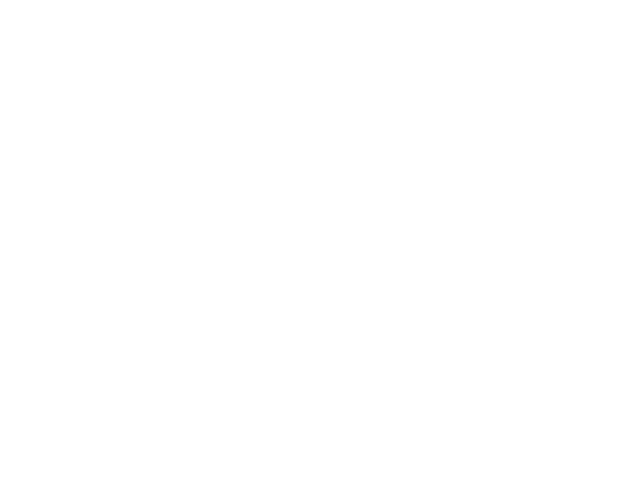

In [5]:
x, y = vpd.xyplot('Traffic', 'COLLISION-DAMAGE UNDER $1000', 1 )
import matplotlib.pyplot as plt
%pylab nbagg
plt.title("Min daily temp vs. number of collisions on that day")
plt.scatter(x,y)

## What we really want to do

**Question** Is look at on day $x$ if it rains, freezes that *night*, is there a disproporionate number of accidents on day $x+1$? 

**Strategy** 

 * Iterate through every day in the weather data. 
 * Look for days with rain, and min temperature < 0. 
 * Check to see if we have the crime data for the **next** day.
 * Count car accidents above and below \$1000. 
 
 * Compare these numbers to normal days. 
 
**Once you have complete this**

 * Do accidents after freezing rain happen on hills?  Intersections? Make a heat map of all the accident locations. 

In [6]:
import datetime as dt
vpd.wdatlist[ dt.date(2016, 1, 16) ]
## weather data Jan 16th, 2016. 
## Max 10.2 c
## Min 4.6 c
## Mean 7.4 c
## 11.8mm rain! 
## 0.0 cm snow.

(10.2, 4.6, 7.4, 11.8, 0.0)

In [7]:
## vpd.wdatlist is dictorary:
## indexed by date
## vpd.wdatlist[date data] = (max c, min c, mean c, rain cm, snow cm)

f_rain_events = []

## iterating the wdatlist dictionary
for dat, wdat in vpd.wdatlist.items():
    ## dat is the date, wdat is wdatlist[dat], i.e. the weather tuple
    if (wdat[1]<0.0) and (wdat[3]>0.0):
        #print("date = ",dat, "weather = ", wdat)
        f_rain_events.append(dat)

print(len(f_rain_events), " freezing rain events.")
sfre = sorted(f_rain_events)
#for x in sfre:
#    print(x)
    

80  freezing rain events.


In [8]:
## Let's look for crime records on f_rain_events day + 1. 
##  for this we need the timedelta object (a difference of dates)
one_day = dt.timedelta(1) ## see time delta docs

hdata = []

tinc_after = []
for x in f_rain_events:
    next_day = x + one_day
    ## let's look for next_day in the crime data. 
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            tinc_after.append(c)
            hdata.append( [c.latitude, c.longitude, 0.02] )
print(len(tinc_after), "  ? maybe relevant ? traffic events after freezing rain, on all days.")
print(len(f_rain_events), " total days w/ freezing rain. ")
print("Average of ", len(tinc_after)/len(f_rain_events), " per freezing rain day. " )

## let's compare to "normal days".  Normal will mean, not a freezing rain day. 
## all dates. . .
allothdats = [k+one_day for k in vpd.wdatlist.keys() if (k not in f_rain_events)]
oth_coll = []
oth_hdata = []
print(len(allothdats), " total other days")
for x in allothdats:
    for c in vpd.cdata:
        if (c.incident_datetime.date() == next_day) and\
           (c.parent_incident_type=='Traffic') and\
           ( (c.incident_type_primary=="COLLISION-DAMAGE OVER $1000") or\
             (c.incident_type_primary=="COLLISION-DAMAGE UNDER $1000") or\
             (c.incident_type_primary=='COLLISION-NON-FATAL INJURY')):
            oth_coll.append(c)
            oth_hdata.append( [c.latitude, c.longitude, 0.02] )
print("Average of ", len(oth_coll)/len(allothdats), " per non-freezing rain day. " )

167   ? maybe relevant ? traffic events after freezing rain, on all days.
80  total days w/ freezing rain. 
Average of  2.0875  per freezing rain day. 
1922  total other days
Average of  3.0  per non-freezing rain day. 


In [9]:
## let's build a heat map of collisions after freezing rain. 
expaths = ["/usr/lib/python3/dist-packages", "/usr/local/lib/python3.5/dist-packages"]
for xp in expaths:
    if (xp not in sys.path):
        sys.path.append(xp)

## sudo pip install folium

import folium as fo
from folium import plugins as fpl

mapa = fo.Map([48.4323, -123.3720], tiles='Stamen Terrain', zoom_start=13)
mapa.add_children(fpl.HeatMap(hdata))
#mapa.create_map(path='assault.wdw.heatmap.html')
mapa


## Lab 2

Today, we will use an ordinary least squares method to see which crime types are most correlated with mean temperature.

### Data types
vpd.ccdata is a dictionary whose keys are tuples. For each day with weather data, the key is (xd.incident_datetime.date(),xd.parent_incident_type, xd.incident_type_primary), as seen in the bottom of vicpd.py. The value associated with that key is the number of crimes of those types on that day.

In [10]:
## some simple print statements can verify this: adding .keys() to the end of a dictionary returns all of its keys.
#print(vpd.ccdata.keys())

#
# tip: double click the bar to the left of a long string of output to hide it

In [11]:
#Check to see that weather data actually does exist for each date in the ccdata keys
for key in vpd.ccdata.keys():
    if key != 0:
        if not (key[0] in vpd.wdatlist):
            print("Missing weather data for date ", key[0], " in ccdata")
            ##looks good!

In [12]:
# one of the keys is the integer 0 instead of a tuple, so lets skip over that element.
for key in vpd.ccdata.keys():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            print("there were ", vpd.ccdata[key], " crimes of type ", key[2], " on ", key[0])

there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2015-04-01
there were  2  crimes of type  BREAK & ENTER-BUSINESS  on  2014-04-28
there were  2  crimes of type  BREAK & ENTER-RESIDENCE  on  2013-08-02
there were  2  crimes of type  BREAK & ENTER-BUSINESS  on  2012-11-17
there were  1  crimes of type  BREAK & ENTER-BUSINESS  on  2015-02-25
there were  2  crimes of type  BREAK & ENTER-OTHER  on  2016-08-16
there were  2  crimes of type  BREAK & ENTER-BUSINESS  on  2013-12-26
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-02-16
there were  2  crimes of type  BREAK & ENTER-BUSINESS  on  2014-10-01
there were  1  crimes of type  BREAK & ENTER-RESIDENCE  on  2013-07-28
there were  1  crimes of type  BREAK & ENTER-BUSINESS  on  2013-10-22
there were  2  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-04-13
there were  2  crimes of type  BREAK & ENTER-RESIDENCE  on  2012-03-13
there were  2  crimes of type  BREAK & ENTER-OTHER  on  2016-10-06
there were  1  crime

Now, how many b&e's occurred on days where the mean temperature was in the interval [n, n+1)?
First, lets see what the max and min mean temperatures are.

In [13]:
print("on datetime.date(2014, 9, 11), the mean temperature was ", vpd.wdatlist[datetime.date(2014, 9, 11)][2])

on datetime.date(2014, 9, 11), the mean temperature was  14.6


In [14]:
mintemp = 100
maxtemp = 0
for date in vpd.wdatlist.keys():
    if vpd.wdatlist[date][2] < mintemp:
        mintemp = vpd.wdatlist[date][2]
    if vpd.wdatlist[date][2] > maxtemp:
        maxtemp = vpd.wdatlist[date][2]
        
print(mintemp, maxtemp)

-5.2 25.0


In [15]:
tempBuckets = range(int(mintemp), int(maxtemp) + 1)
print(tempBuckets)

range(-5, 26)


In [16]:
## Build another list: keys are temperature floors, and values are the number of crimes
numCrimesbyTemp = [0 for temp in tempBuckets]
for key in vpd.ccdata.keys():
    if key != 0:
        if key[1] == 'Breaking & Entering':
            # remember key[0] = date, and wdatlist is a dictionary with dates as keys.
            tempFloor = int(vpd.wdatlist[key[0]][2])
            numCrimesbyTemp[tempBuckets.index(tempFloor)] += vpd.ccdata[key]
            

In [17]:
print(numCrimesbyTemp)

[0, 2, 6, 13, 21, 35, 62, 104, 164, 186, 160, 164, 221, 189, 192, 167, 175, 156, 171, 175, 184, 194, 247, 153, 61, 51, 14, 16, 1, 0, 3]


In [18]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


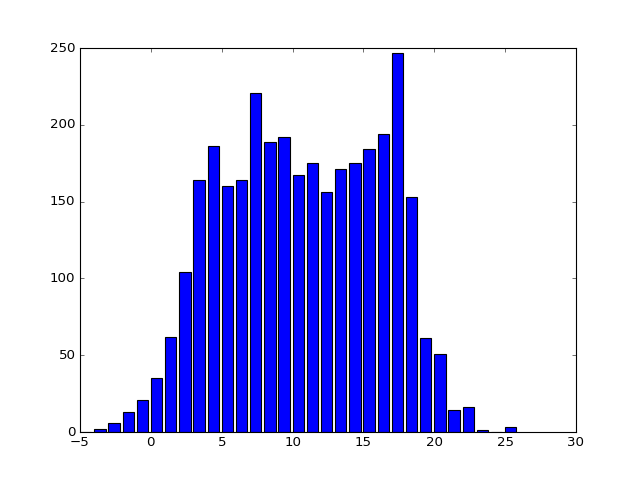

In [19]:
import matplotlib.pyplot as plt
plt.close()
plt.bar(tempBuckets, numCrimesbyTemp)
plt.show()
## What is wrong with this picture? What else should we do to our number of crimes by temperature to make this
## information more relevant?

In [20]:
numDaysbyTemp = [0 for temp in tempBuckets]
#for each day with weather data, 
for date in vpd.wdatlist:
    numDaysbyTemp[int(vpd.wdatlist[date][2])] += 1

In [21]:
print(numDaysbyTemp[:22]) ##Nice, there are a reasonable number of days with most temperatures.
##We will need to look out for division by zero though.

[47, 49, 59, 90, 107, 115, 112, 140, 117, 96, 103, 98, 90, 108, 121, 119, 123, 121, 71, 37, 23, 13]


In [22]:
avgCrimeperDaybyTemp = [0 for i in range(len(numDaysbyTemp))]

for i in range(len(avgCrimeperDaybyTemp)):
    if numDaysbyTemp[i] != 0:
        avgCrimeperDaybyTemp[i] = numCrimesbyTemp[i]/numDaysbyTemp[i]

In [23]:
print(avgCrimeperDaybyTemp)

[0.0, 0.04081632653061224, 0.1016949152542373, 0.14444444444444443, 0.19626168224299065, 0.30434782608695654, 0.5535714285714286, 0.7428571428571429, 1.4017094017094016, 1.9375, 1.5533980582524272, 1.6734693877551021, 2.4555555555555557, 1.75, 1.5867768595041323, 1.403361344537815, 1.4227642276422765, 1.2892561983471074, 2.408450704225352, 4.72972972972973, 8.0, 14.923076923076923, 24.7, 153.0, 0, 51.0, 14.0, 16.0, 0.16666666666666666, 0.0, 0.21428571428571427]


<IPython.core.display.Javascript object>


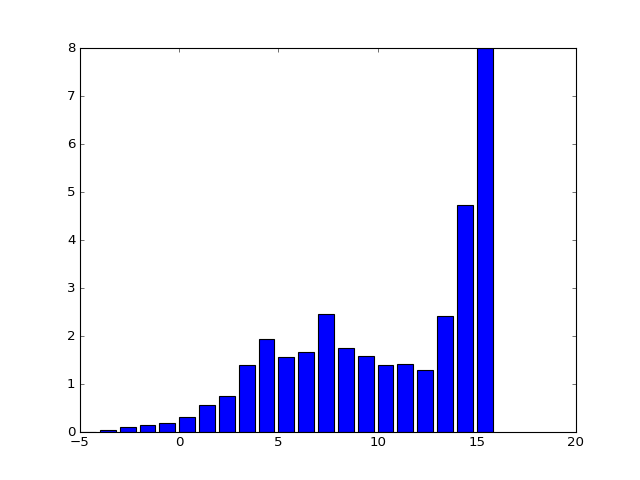

In [24]:
plt.close()
plt.bar(tempBuckets[:21], avgCrimeperDaybyTemp[:21])
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
X = sm.add_constant(tempBuckets[:21]) ## x
Y = avgCrimeperDaybyTemp[:21] ## y

model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     24.27
Date:                Tue, 21 Feb 2017   Prob (F-statistic):           9.37e-05
Time:                        15:33:18   Log-Likelihood:                -33.388
No. Observations:                  21   AIC:                             70.78
Df Residuals:                      19   BIC:                             72.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4973      0.353      1.409      0.1